# Datacamp Image Processing

### Kadriye Tuba Turkcan Karaca

## RGB vs Grayscale

In [32]:
from skimage import color
import matplotlib.pyplot as plt
#import data module
from skimage import data
import numpy as np

In [29]:
def show_image(image, title = 'Image', cmap_type = 'gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [30]:
coffee_image = data.coffee()
coins_image = data.coins()


In [59]:
grayscale = color.rgb2gray(coffee_image)
rgb = color.gray2rgb(grayscale)

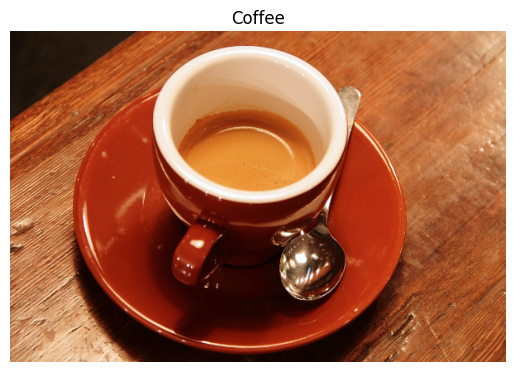

In [60]:
show_image(coffee_image,'Coffee')

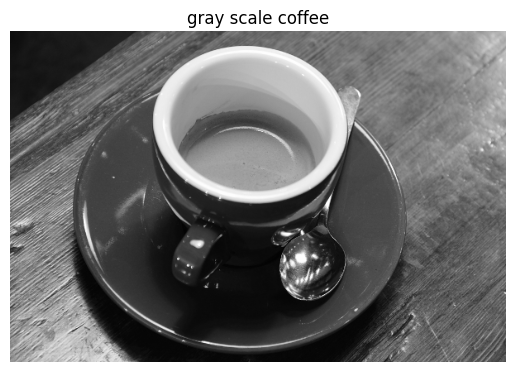

In [61]:
show_image(rgb, 'gray scale coffee')

### RGB to grayscale
Load an image from scikit-image module data and make it grayscale, then compare both of them in the output.



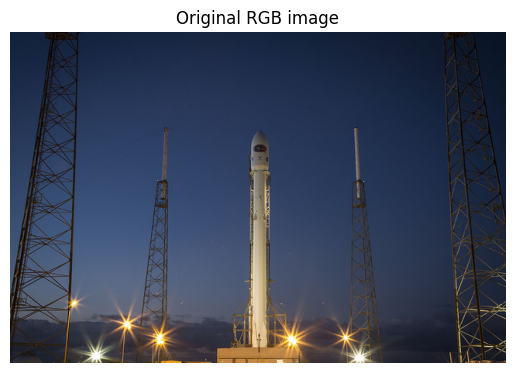

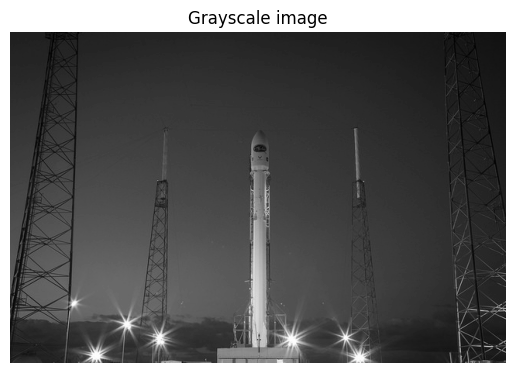

In [31]:
# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

### Flipping out
Flip the image horizontally and vertically. Then display the image using the show_image() function.

In [33]:
# Flip the image vertically
flipped_rocket = np.flipud(rocket)

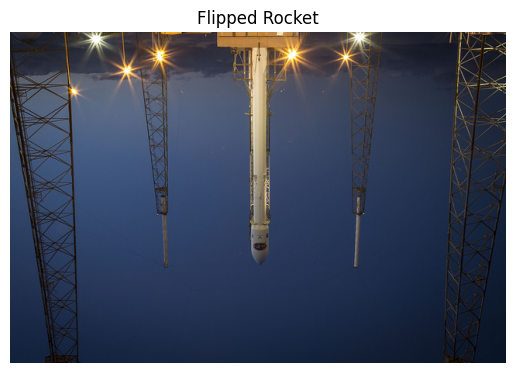

In [34]:
show_image(flipped_rocket, "Flipped Rocket")

In [35]:
# Flip the previous image horizontally
rocket_horizontal_flip = np.fliplr(flipped_rocket)

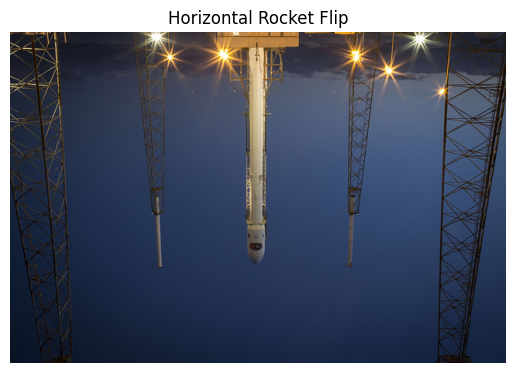

In [36]:
show_image(rocket_horizontal_flip, "Horizontal Rocket Flip")

# Images as NdArrays

In [38]:
#loading image using matplotlib
image = plt.imread('woman_smiling.jpg')
type(image)

numpy.ndarray

## Colors with Numpy

In [40]:
#Obtaining the red values of the image
red = image[:,:,0]
red

array([[ 52,  51,  51, ..., 128, 128, 124],
       [ 48,  50,  50, ..., 132, 128, 126],
       [ 50,  52,  51, ..., 129, 121, 120],
       ...,
       [  3,   3,   2, ...,  57,  81,  99],
       [ 12,  11,  11, ...,  63,  84, 106],
       [ 22,  20,  20, ...,  50,  69,  94]], dtype=uint8)

In [41]:
#Obtaining the green values of the image
green = image[:,:,1]
#Obtaining the blue values of the image
blue = image[:,:,2]

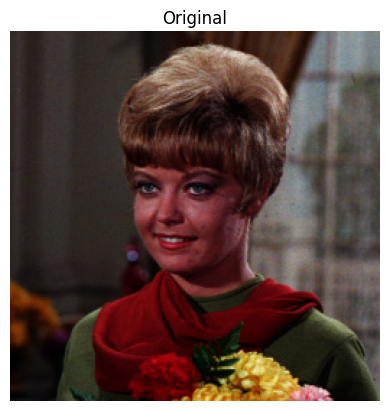

In [47]:
plt.imshow(image) #cmap = 'gray'
plt.title('Original')
plt.axis('off')
plt.show()

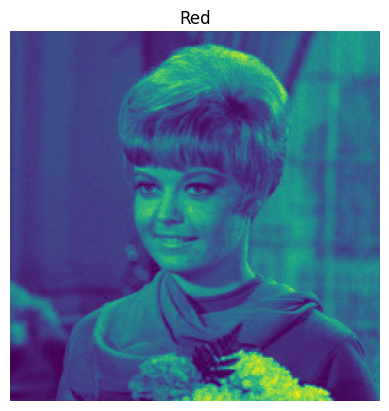

In [44]:
plt.imshow(red) #cmap = 'gray'
plt.title('Red')
plt.axis('off')
plt.show()

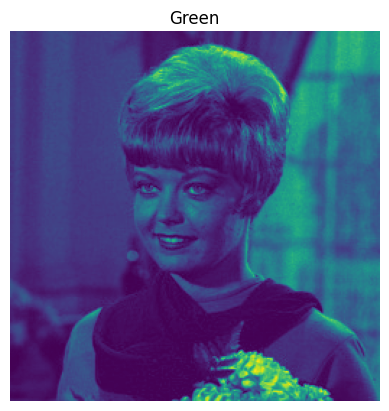

In [45]:
plt.imshow(green) #cmap = 'gray'
plt.title('Green')
plt.axis('off')
plt.show()

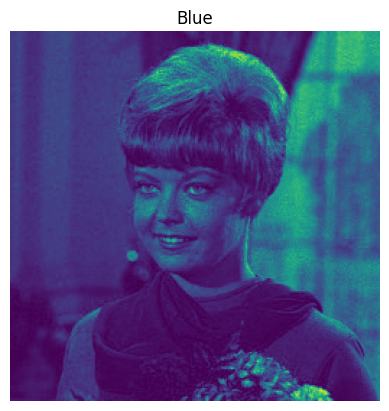

In [46]:
plt.imshow(blue) #cmap = 'gray'
plt.title('Blue')
plt.axis('off')
plt.show()

In [48]:
#Accesing the shape of the image
image.shape

(256, 256, 3)

In [49]:
image.size

196608

## Histograms

Use hist() to display the 256 different intensities of the red color. And ravel() to make these color values an array of one flat dimension.


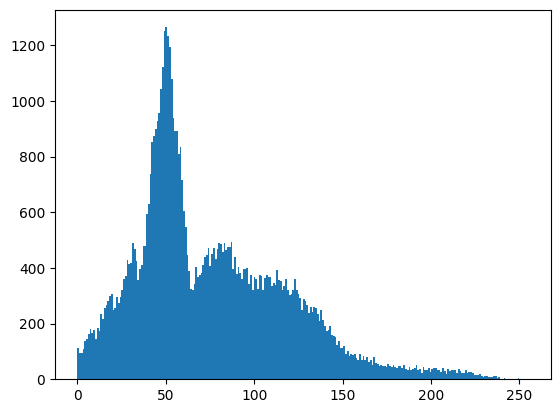

In [51]:
# Obtain the red histogram
plt.hist(red.ravel(),bins=256)
plt.show()

## Global Thresholding



In [65]:
from skimage.filters import threshold_otsu

In [68]:
chess_image = plt.imread('chess_pieces_image.jpeg')


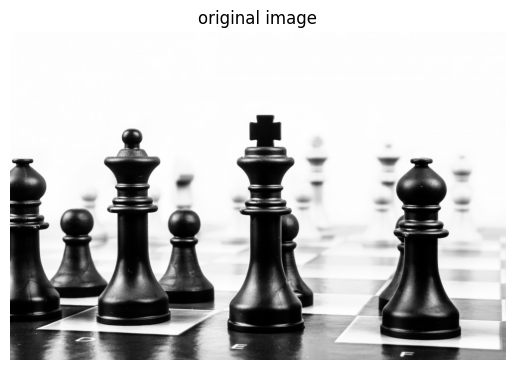

In [69]:
show_image(chess_image, 'original image')

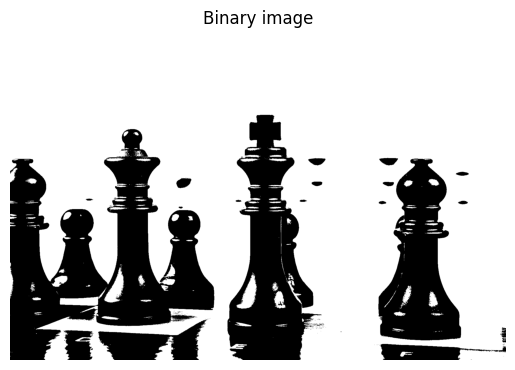

In [70]:
# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

# Local Thresholding
### Uneven background
Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then we can use a global threshold value, using threshold_otsu(). However, if there's uneven background illumination, adaptive thresholding threshold_local() (a.k.a. local thresholding) may produce better results.

Now, we will compare both types of thresholding methods (global and local), to find the optimal way to obtain the binary image we need.

In [77]:
page_image = data.page()

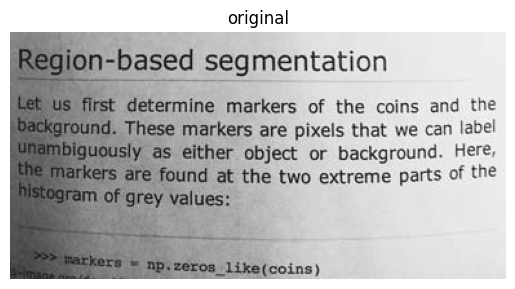

In [78]:
#page_image = plt.imread('page_image.png')
show_image(page_image, 'original')

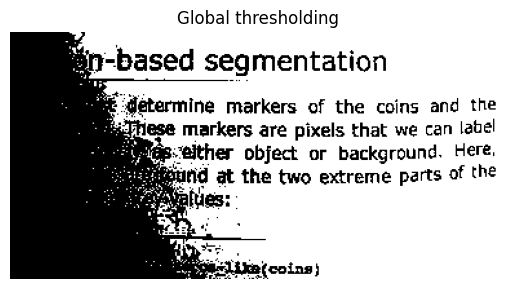

In [79]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

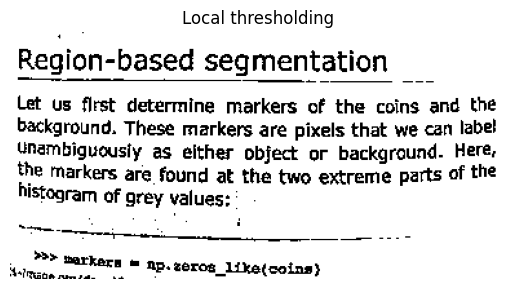

In [80]:
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

### Trying other methods
Not being sure about what thresholding method to use isn't a problem. In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.

In [86]:
fruits_image = plt.imread('fruits.jpeg')

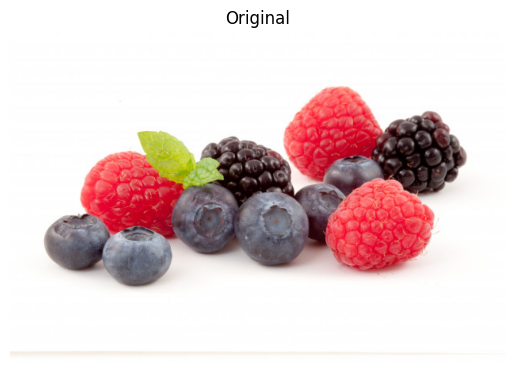

In [87]:
show_image(fruits_image, 'Original')

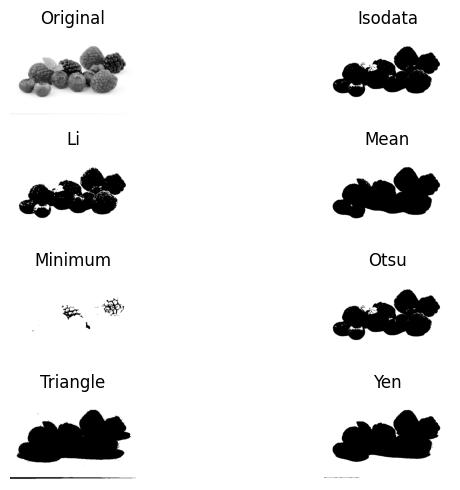

In [88]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

Now, we will decide what type of thresholding is best used to binarize an image of knitting and craft tools. In doing so, you will be able to see the shapes of the objects, from paper hearts to scissors more clearly.

What type of thresholding would you use judging by the characteristics of the image? Is the background illumination and intensity even or uneven?

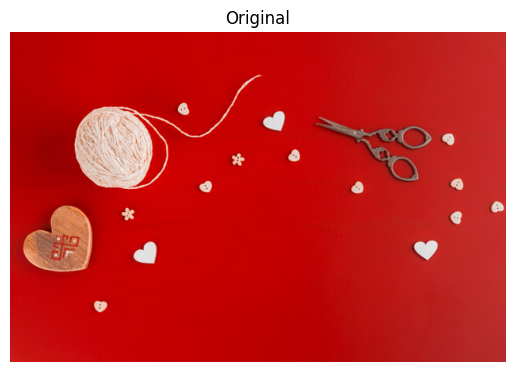

In [91]:
tools_image = plt.imread('tools_image.jpeg')
show_image(tools_image, 'Original')

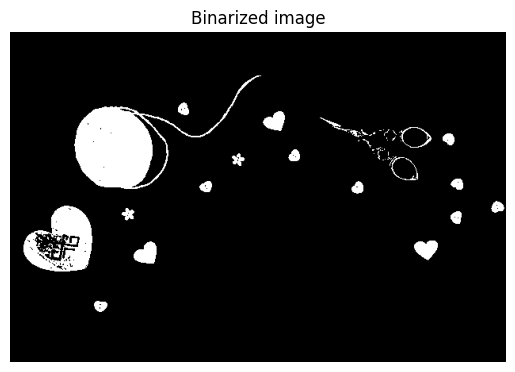

In [92]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

## Edge detection
Detect edges in an image by applying the Sobel filter.

Soap pills of heart and rectangle shapes in blue background
Image preloaded as soaps_image.
Theshow_image() function has been already loaded for you.

Let's see if it spots all the figures in the image.

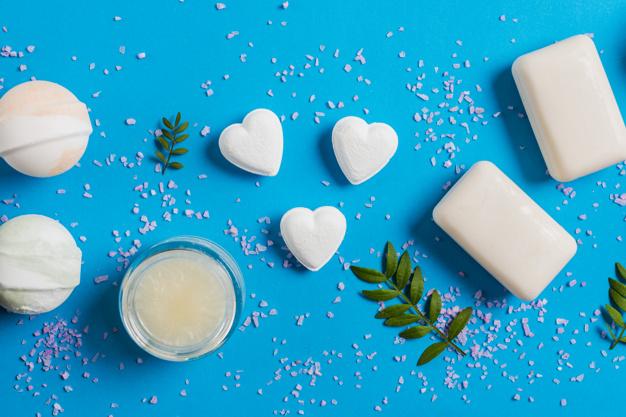

In [7]:

# Import the color module
from skimage import color
# Import the filters module and sobel function
from skimage.filters import sobel


In [12]:
!pip3 install pooch

Defaulting to user installation because normal site-packages is not writeable
  Using cached pooch-1.6.0-py3-none-any.whl (56 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)


In [17]:
data.coins()

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [18]:
coins_image = data.coins()

In [3]:
#!pip3 install scikit-image

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 43.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 51.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 44.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.7 MB/s eta 0:00:0000:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [19]:
# Make the image grayscale
soaps_image_gray = color.rgb2gray(coins_image)
soaps_image_gray

ValueError: the input array must have size 3 along `channel_axis`, got (303, 384)

In [ ]:


# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")